In [1]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib.pyplot as plt

import csv

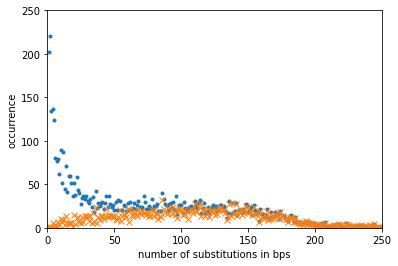

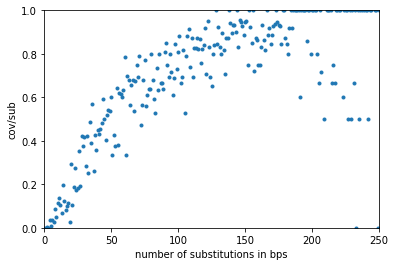

In [2]:
x    = []
y    = []
xsub = []
ysub = []
subs = []
covs = []
rates = []
xf   = []
yf   = []
xp   = np.linspace(0, 1000, 1000)

with open('../versions/rscape/rscape_v1.2.3/Rfam.14.0.seed.3D.power.subs','r') as csvfile:
    plots = csv.reader(csvfile, delimiter = '\t')
    
    for row in plots:
        xval = float(row[0])
        yval = float(row[1])
        sub  = int(row[2])
        cov  = int(row[3])
        subs.append(sub)
        covs.append(cov)
        
        rate = -1
        if (sub > 0): rate = cov/sub
        rates.append(rate)
        
        x.append(xval)
        y.append(yval)             
 
plt.plot(x,subs,'.', label='substitutions in bps')
plt.plot(x,covs,'x', label='substitutions in cov_bps')
plt.xlabel('number of substitutions in bps')
plt.ylabel('occurrence')
plt.xlim(0,250)
plt.ylim(0,250)
plt.show()

plt.plot(x,rates,'.', label='substitutions in cov_bps')
plt.xlabel('number of substitutions in bps')
plt.ylabel('cov/sub')
plt.xlim(0,250)
plt.ylim(0,1)
plt.show()


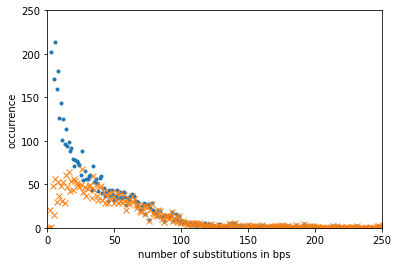

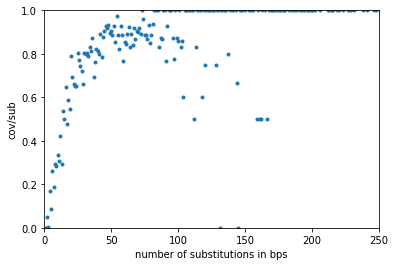

In [3]:
x    = []
y    = []
xsub = []
ysub = []
subs = []
covs = []
rates = []
xf   = []
yf   = []
xp   = np.linspace(0, 1000, 1000)

with open('../versions/rscape/rscape_v1.5.16/Rfam.14.0.seed.3D.power.subs','r') as csvfile:
    plots = csv.reader(csvfile, delimiter = '\t')
    
    for row in plots:
        xval = float(row[0])
        yval = float(row[1])
        sub  = int(row[2])
        cov  = int(row[3])
        subs.append(sub)
        covs.append(cov)
        
        rate = -1
        if (sub > 0): rate = cov/sub
        rates.append(rate)
        
        x.append(xval)
        y.append(yval)             
 
plt.plot(x,subs,'.', label='substitutions in bps')
plt.plot(x,covs,'x', label='substitutions in cov_bps')
plt.xlabel('number of substitutions in bps')
plt.ylabel('occurrence')
plt.xlim(0,250)
plt.ylim(0,250)
plt.show()

plt.plot(x,rates,'.', label='substitutions in cov_bps')
plt.xlabel('number of substitutions in bps')
plt.ylabel('cov/sub')
plt.xlim(0,250)
plt.ylim(0,1)
plt.show()


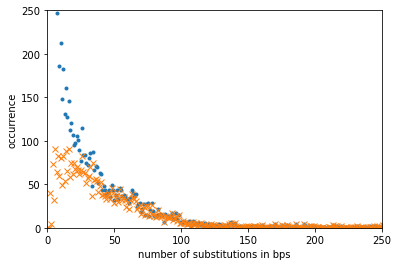

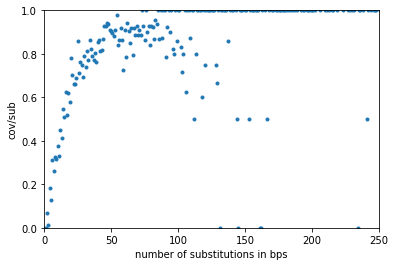

In [4]:
x    = []
y    = []
xsub = []
ysub = []
subs = []
covs = []
rates = []
xf   = []
yf   = []
xp   = np.linspace(0, 1000, 1000)

with open('../data/power/Rfam.15.0.seed.3D.power.subs','r') as csvfile:
    plots = csv.reader(csvfile, delimiter = '\t')
    
    for row in plots:
        xval = float(row[0])
        yval = float(row[1])
        sub  = int(row[2])
        cov  = int(row[3])
        subs.append(sub)
        covs.append(cov)
        
        rate = -1
        if (sub > 0): rate = cov/sub
        rates.append(rate)
        
        x.append(xval)
        y.append(yval)             
        if (xval <= 80) or (xval > 80 and yval > 0.9):
            xsub.append(xval)
            ysub.append(yval)
       
    z = np.polyfit(xsub, ysub, 10) 
    p = np.poly1d(z)

plt.plot(x,subs,'.', label='substitutions in bps')
plt.plot(x,covs,'x', label='substitutions in cov_bps')
plt.xlabel('number of substitutions in bps')
plt.ylabel('occurrence')
plt.xlim(0,250)
plt.ylim(0,250)
plt.show()

plt.plot(x,rates,'.', label='substitutions in cov_bps')
plt.xlabel('number of substitutions in bps')
plt.ylabel('cov/sub')
plt.xlim(0,250)
plt.ylim(0,1)
plt.show()


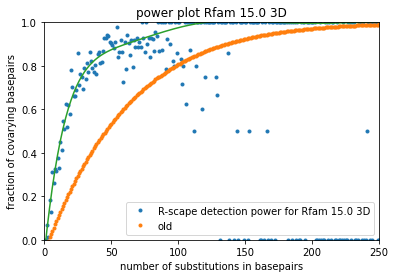

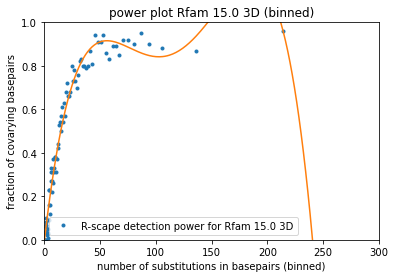

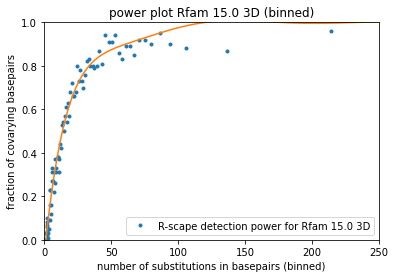

In [5]:
xx = []
yy = []
with open('../versions/rscape/rscape_v1.2.3/data/power/Rfam.14.0.seed.power.subs.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter = '\t')
    for row in plots:
        xx.append(float(row[0]))
        yy.append(float(row[1]))
    
plt.plot(x, y, '.', label='R-scape detection power for Rfam 15.0 3D')
plt.plot(xx, yy, '.', label='old')
plt.plot(xp, p(xp), '-')
plt.xlabel('number of substitutions in basepairs')
plt.ylabel('fraction of covarying basepairs')
plt.title('power plot Rfam 15.0 3D')
plt.xlim(0,250)
plt.ylim(0,1)
plt.legend()
plt.show()

with open('../data/power/Rfam.15.0.seed.3D.power.subs.csv', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(xp,p(xp)))

!../scripts/power_by_equal_size_bin.pl ../data/power/Rfam.15.0.seed.3D.power.subs > ../data/power/Rfam.15.0.seed.3D.power.subs.bin

with open('../data/power/Rfam.15.0.seed.3D.power.subs.bin','r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    for row in plots:
        xval = float(row[1])
        yval = float(row[2])
        
        xf.append(xval)
        yf.append(yval)             
        
    z  = np.polyfit(xf,yf,4)
    pf = np.poly1d(z)


plt.plot(xf, yf, '.', label='R-scape detection power for Rfam 15.0 3D')
plt.plot(xp, pf(xp), '-')
plt.xlabel('number of substitutions in basepairs (binned)')
plt.ylabel('fraction of covarying basepairs')
plt.title('power plot Rfam 15.0 3D (binned)')
plt.xlim(0,300)
plt.ylim(0,1)
plt.legend()
plt.show()

with open('../data/power/Rfam.15.0.seed.3D.power.subs.bin.csv', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(xp,pf(xp)))
    
plt.plot(xf, yf, '.', label='R-scape detection power for Rfam 15.0 3D')
plt.plot(xp, p(xp), '-')
plt.xlabel('number of substitutions in basepairs (binned)')
plt.ylabel('fraction of covarying basepairs')
plt.title('power plot Rfam 15.0 3D (binned)')
plt.xlim(0,250)
plt.ylim(0,1)
plt.legend()
plt.savefig('../data/power/Rfam.15.0.seed.3D.power.subs.pdf')
plt.show()

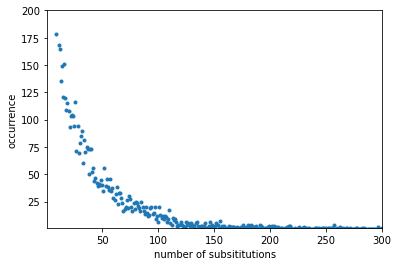

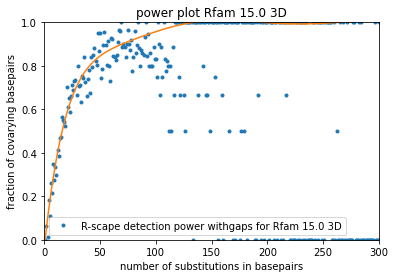

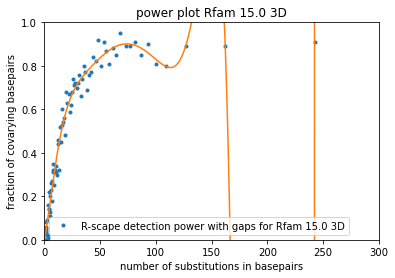

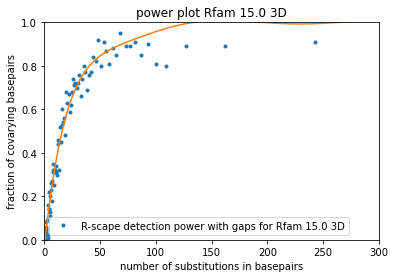

In [6]:
x    = []
y    = []
xsub = []
ysub = []
subs = []
covs = []
xf   = []
yf   = []
xp   = np.linspace(0, 1000, 1000)

with open('../data/power/Rfam.15.0.seed.3D.power.subs.withgaps','r') as csvfile:
    plots = csv.reader(csvfile, delimiter = '\t')
    for row in plots:
        xval = float(row[0])
        yval = float(row[1])
        subs.append(int(row[2]))
        covs.append(int(row[3]))
        
        x.append(xval)
        y.append(yval)             
        if (xval < 80) or (xval > 80 and yval > 0.9):
            xsub.append(xval)
            ysub.append(yval)
       
    z = np.polyfit(xsub, ysub, 10)
    p = np.poly1d(z)

plt.plot(x,subs,'.', label='substitutions')
plt.xlabel('number of subsititutions')
plt.ylabel('occurrence')
plt.xlim(1,300)
plt.ylim(1,200)
plt.show()

plt.plot(x, y, '.', label='R-scape detection power withgaps for Rfam 15.0 3D')
plt.plot(xp, p(xp), '-')
plt.xlabel('number of substitutions in basepairs')
plt.ylabel('fraction of covarying basepairs')
plt.title('power plot Rfam 15.0 3D')
plt.xlim(0,300)
plt.ylim(0,1)
plt.legend()
plt.show()

with open('../data/power/Rfam.15.0.seed.3D.power.subs.withgaps.csv', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(xp,p(xp)))

!../scripts/power_by_equal_size_bin.pl ../data/power/Rfam.15.0.seed.3D.power.subs.withgaps > ../data/power/Rfam.15.0.seed.3D.power.subs.withgaps.bin

with open('../data/power/Rfam.15.0.seed.3D.power.subs.withgaps.bin','r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    for row in plots:
        xval = float(row[1])
        yval = float(row[2])
        
        xf.append(xval)
        yf.append(yval)             
        
    z  = np.polyfit(xf,yf,10)
    pf = np.poly1d(z)


plt.plot(xf, yf, '.', label='R-scape detection power with gaps for Rfam 15.0 3D')
plt.plot(xp, pf(xp), '-')
plt.xlabel('number of substitutions in basepairs')
plt.ylabel('fraction of covarying basepairs')
plt.title('power plot Rfam 15.0 3D')
plt.xlim(0,300)
plt.ylim(0,1)
plt.legend()
plt.show()

with open('../data/power/Rfam.15.0.seed.3D.power.subs.withgaps.bin.csv', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(xp,p(xp)))

plt.plot(xf, yf, '.', label='R-scape detection power with gaps for Rfam 15.0 3D')
plt.plot(xp, p(xp), '-')
plt.xlabel('number of substitutions in basepairs')
plt.ylabel('fraction of covarying basepairs')
plt.title('power plot Rfam 15.0 3D')
plt.xlim(0,300)
plt.ylim(0,1)
plt.legend()
plt.savefig('../data/power/Rfam.15.0.seed.3D.power.subs.withgaps.pdf')
plt.show()

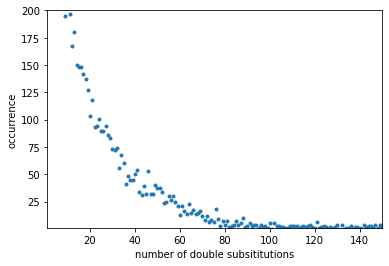

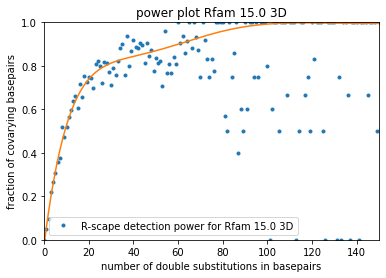

In [7]:
x    = []
y    = []
xsub = []
ysub = []
subs = []
covs = []
xp   = np.linspace(0, 1000, 1000)

with open('../data/power/Rfam.15.0.seed.3D.power.double','r') as csvfile:
    plots = csv.reader(csvfile, delimiter = '\t')
    for row in plots:
        xval = float(row[0])
        yval = float(row[1])
        subs.append(int(row[2]))
        covs.append(int(row[3]))
        
        x.append(xval)
        y.append(yval)             
        if (xval < 50) or (xval > 50 and yval > 0.8):
            xsub.append(xval)
            ysub.append(yval)
       
    z = np.polyfit(xsub,ysub,10)
    p = np.poly1d(z)

plt.plot(x,subs,'.', label='double substitutions')
plt.xlabel('number of double subsititutions')
plt.ylabel('occurrence')
plt.xlim(1,150)
plt.ylim(1,200)
plt.show()

plt.plot(x, y, '.', label='R-scape detection power for Rfam 15.0 3D')
plt.plot(xp, p(xp), '-')
plt.xlabel('number of double substitutions in basepairs')
plt.ylabel('fraction of covarying basepairs')
plt.title('power plot Rfam 15.0 3D')
plt.xlim(0,150)
plt.ylim(0,1)
plt.legend()
plt.show()

with open('../data/power/Rfam.15.0.seed.3D.power.double.csv', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(xp,p(xp)))


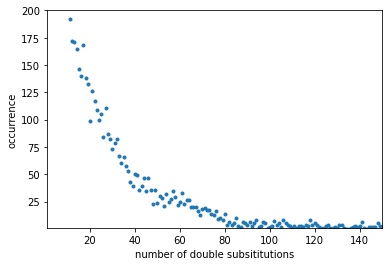

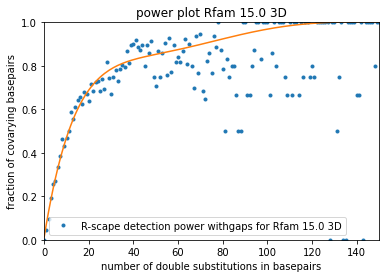

In [8]:
x    = []
y    = []
xsub = []
ysub = []
subs = []
covs = []
xp   = np.linspace(0, 1000, 1000)

with open('../data/power/Rfam.15.0.seed.3D.power.double.withgaps','r') as csvfile:
    plots = csv.reader(csvfile, delimiter = '\t')
    for row in plots:
        xval = float(row[0])
        yval = float(row[1])
        subs.append(int(row[2]))
        covs.append(int(row[3]))
        
        x.append(xval)
        y.append(yval)             
        if (xval < 50) or (xval > 50 and yval > 0.8):
            xsub.append(xval)
            ysub.append(yval)
       
    z = np.polyfit(xsub,ysub,10)
    p = np.poly1d(z)

plt.plot(x,subs,'.', label='double substitutions')
plt.xlabel('number of double subsititutions')
plt.ylabel('occurrence')
plt.xlim(1,150)
plt.ylim(1,200)
plt.show()

plt.plot(x, y, '.', label='R-scape detection power withgaps for Rfam 15.0 3D')
plt.plot(xp, p(xp), '-')
plt.xlabel('number of double substitutions in basepairs')
plt.ylabel('fraction of covarying basepairs')
plt.title('power plot Rfam 15.0 3D')
plt.xlim(0,150)
plt.ylim(0,1)
plt.legend()
plt.show()

with open('../data/power/Rfam.15.0.seed.3D.power.double.withgaps.csv', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(xp,p(xp)))


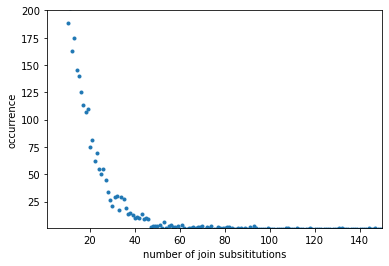

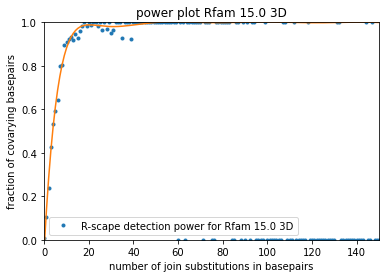

In [9]:
x    = []
y    = []
xsub = []
ysub = []
subs = []
covs = []
xp   = np.linspace(0, 1000, 1000)

with open('../data/power/Rfam.15.0.seed.3D.power.join','r') as csvfile:
    plots = csv.reader(csvfile, delimiter = '\t')
    for row in plots:
        xval = float(row[0])
        yval = float(row[1])
        subs.append(int(row[2]))
        covs.append(int(row[3]))
        
        x.append(xval)
        y.append(yval)             
        if (xval < 40) or (xval > 40 and yval > 0.8):
            xsub.append(xval)
            ysub.append(yval)
       
    z = np.polyfit(xsub,ysub,10)
    p = np.poly1d(z)

plt.plot(x,subs,'.', label='join substitutions')
plt.xlabel('number of join subsititutions')
plt.ylabel('occurrence')
plt.xlim(1,150)
plt.ylim(1,200)
plt.show()

plt.plot(x, y, '.', label='R-scape detection power for Rfam 15.0 3D')
plt.plot(xp, p(xp), '-')
plt.xlabel('number of join substitutions in basepairs')
plt.ylabel('fraction of covarying basepairs')
plt.title('power plot Rfam 15.0 3D')
plt.xlim(0,150)
plt.ylim(0,1)
plt.legend()
plt.show()

with open('../data/power/Rfam.15.0.seed.3D.power.join.csv', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(xp,p(xp)))


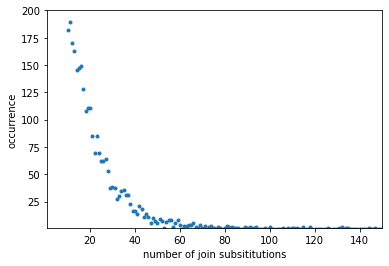

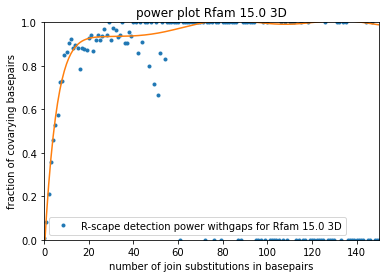

In [10]:
x    = []
y    = []
xsub = []
ysub = []
subs = []
covs = []
xp   = np.linspace(0, 1000, 1000)

with open('../data/power/Rfam.15.0.seed.3D.power.join.withgaps','r') as csvfile:
    plots = csv.reader(csvfile, delimiter = '\t')
    for row in plots:
        xval = float(row[0])
        yval = float(row[1])
        subs.append(int(row[2]))
        covs.append(int(row[3]))
        
        x.append(xval)
        y.append(yval)             
        if (xval < 50) or (xval > 50 and yval > 0.8):
            xsub.append(xval)
            ysub.append(yval)
       
    z = np.polyfit(xsub,ysub,12)
    p = np.poly1d(z)

plt.plot(x,subs,'.', label='join substitutions')
plt.xlabel('number of join subsititutions')
plt.ylabel('occurrence')
plt.xlim(1,150)
plt.ylim(1,200)
plt.show()

plt.plot(x, y, '.', label='R-scape detection power withgaps for Rfam 15.0 3D')
plt.plot(xp, p(xp), '-')
plt.xlabel('number of join substitutions in basepairs')
plt.ylabel('fraction of covarying basepairs')
plt.title('power plot Rfam 15.0 3D')
plt.xlim(0,150)
plt.ylim(0,1)
plt.legend()
plt.show()

with open('../data/power/Rfam.15.0.seed.3D.power.join.withgaps.csv', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(xp,p(xp)))
